In [13]:
!{sys.executable} -m pip install --upgrade scikit-learn

  Using cached scikit_learn-1.1.2-cp310-cp310-win_amd64.whl (7.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~klearn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.



In [3]:
#Imports 
import pip
import glob, os
from sklearn import svm 
import scipy.io
import numpy as np
from HelperFunctions_ import write_dataset_to_file, split_dataset_paths
import sys 
#!{sys.executable} -m pip install -U matplotlib
from spectral import *
import matplotlib.pyplot as plt

import tables as tab
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC, SVC, OneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.inspection import DecisionBoundaryDisplay




In [4]:
#Finding path names 
Mjosa_data = split_dataset_paths("../Datasets/2022_07_11_Mjosa/2022_07_11_Mjosa/", ["he5", "csv", "jpg"])
Andebu_data = split_dataset_paths("../Datasets/2021_07_21_Andebu/2021_07_21_Andebu/", ["he5", "csv", "jpg"])
Telemark_data = split_dataset_paths("../Datasets/2020_06_23_Telemarkskanalen/2020_06_23_Telemarkskanalen/", ["he5", "csv", "jpg"])


In [5]:
#Amount of dataset should be handled
N_datasets = 2 

#Open files 
open_files_array = []
for i in range(N_datasets):
    file = tab.open_file(Mjosa_data["he5"][i])
    open_files_array.append(file.get_node("/HDFEOS/SWATHS/PRS_L1_HCO/")['Data Fields']['VNIR_Cube'][:,5:,:])

#Load the labels 
load_labels_array = []
for i in range(N_datasets):
    file = Mjosa_data["csv"][i]
    load_labels_array.append(np.loadtxt(file, dtype=np.ubyte))
    



In [6]:
data = open_files_array[1]
labels = load_labels_array[1]

print(labels)


[[5 1 5 ... 5 1 5]
 [2 1 1 ... 1 1 1]
 [3 2 2 ... 1 1 1]
 ...
 [0 0 0 ... 5 5 5]
 [0 0 0 ... 5 5 5]
 [0 0 0 ... 5 5 5]]


In [29]:

# prepare data
X, y = data.transpose(0,2,1).reshape((-1,61)), labels.flatten()

X = preprocessing.scale(X, axis=0)                    # Normalization
#X = preprocessing.normalize(X, axis=0)             # Standardization
print(X.shape, y.shape)

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.999, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1000000, 61) (1000000,)
(1000, 61) (999000, 61) (1000,) (999000,)


In [9]:
#Testing Decision Tree 



In [62]:
# Generate SVM from training data

#svma = SVC(kernel="rbf",max_iter=1e3, tol=1e-5)
svma = OneClassSVM(kernel="rbf", max_iter=1e5, tol=1e5)
svma.fit(X_train, y_train)


OneClassSVM(max_iter=100000.0, tol=100000.0)

In [63]:
# calculate overall accuracy on Training data
(svma.predict(X_train)==y_train).sum()/len(y_train)

0.315

In [64]:
# Accuracy on test data
(svma.predict(X_test)==y_test).sum()/len(y_test)

0.34814814814814815

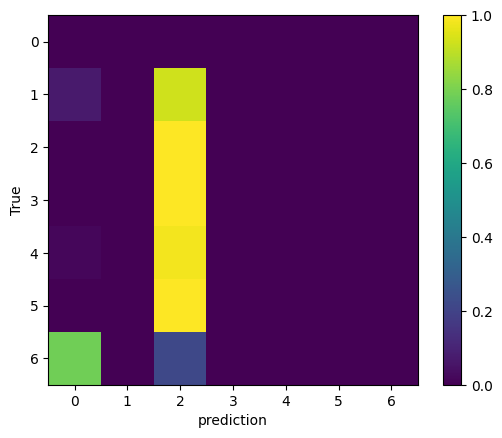

In [65]:
Xout = svma.predict(X)

plt.imshow(Xout.reshape((1000,1000)))

cm = confusion_matrix(labels.flatten(), Xout, normalize='true')

plt.imshow(cm, vmax=1, vmin=0)
plt.ylabel('True')
plt.xlabel('prediction')
plt.colorbar()

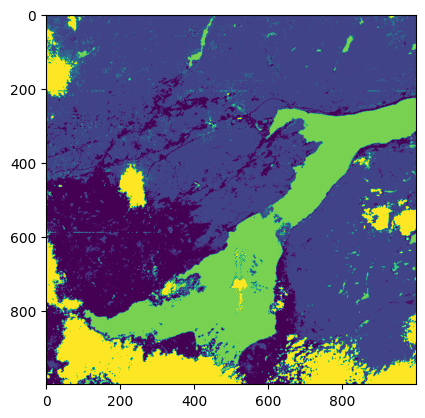

In [23]:
Xout = svma.predict(X)

plt.imshow(Xout.reshape((1000,1000)))

ValueError: X has 2 features, but LinearSVC is expecting 61 features as input.

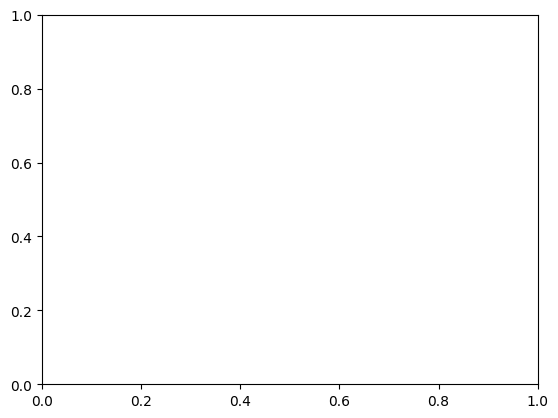

In [24]:
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(svma, X, plot_method="contour", colors="k", levels = [-1,0,1], alpha=0.5, linestyle = ["--", "-", "--"], ax=ax)
#ax.scatter(svma.support_vectors_[:,0], svma.support_vectors_[:,1], s=100, linewidth=1, facecolors="none", edgecolors="k")
#plt.show()